In [ ]:
import pandas as pd
import numpy as np

df = pd.read_csv('/content/Salaries.csv')
df.head()

,Id,EmployeeName,JobTitle,BasePay,OvertimePay,OtherPay,Benefits,TotalPay,TotalPayBenefits,Year,Notes,Agency,Status
0,1,NATHANIEL FORD,GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY,167411.18,0.00,400184.25,NaN,567595.43,567595.43,2011,NaN,San Francisco,NaN
1,2,GARY JIMENEZ,CAPTAIN III (POLICE DEPARTMENT),155966.02,245131.88,137811.38,NaN,538909.28,538909.28,2011,NaN,San Francisco,NaN
2,3,ALBERT PARDINI,CAPTAIN III (POLICE DEPARTMENT),212739.13,106088.18,16452.60,NaN,335279.91,335279.91,2011,NaN,San Francisco,NaN
3,4,CHRISTOPHER CHONG,WIRE ROPE CABLE MAINTENANCE MECHANIC,77916.00,56120.71,198306.90,NaN,332343.61,332343.61,2011,NaN,San Francisco,NaN
4,5,PATRICK GARDNER,"DEPUTY CHIEF OF DEPARTMENT,(FIRE DEPARTMENT)",134401.60,9737.00,182234.59,NaN,326373.19,326373.19,2011,NaN,San Francisco,NaN


# 1st Task

In [ ]:
num_rows, num_columns = df.shape
print(f"Number of rows: {num_rows}")
print(f"Number of columns: {num_columns}")

Number of rows: 148654
Number of columns: 13


In [ ]:
data_types = df.dtypes
print("Data types of each column:")
print(data_types)

Data types of each column:
Id                    int64
EmployeeName         object
JobTitle             object
BasePay             float64
OvertimePay         float64
OtherPay            float64
Benefits            float64
TotalPay            float64
TotalPayBenefits    float64
Year                  int64
Notes               float64
Agency               object
Status              float64
dtype: object


In [ ]:
missing_values = df.isnull().sum()
print("Missing values in each column:")
print(missing_values)


Missing values in each column:
Id                       0
EmployeeName             0
JobTitle                 0
BasePay                609
OvertimePay              4
OtherPay                 4
Benefits             36163
TotalPay                 0
TotalPayBenefits         0
Year                     0
Notes               148654
Agency                   0
Status              148654
dtype: int64


# 2nd Task

In [ ]:
# mean, median, mode, minimum, and maximum salary
mean_salary = df['TotalPay'].mean()
median_salary = df['TotalPay'].median()
mode_salary = df['TotalPay'].mode().iloc[0]
min_salary = df['TotalPay'].min()
max_salary = df['TotalPay'].max()
# range of salaries
salary_range = max_salary - min_salary
# standard deviation
std_dev_salary = df['TotalPay'].std()

print(f"Mean Salary: {mean_salary}")
print(f"Median Salary: {median_salary}")
print(f"Mode Salary: {mode_salary}")
print(f"Minimum Salary: {min_salary}")
print(f"Maximum Salary: {max_salary}")
print(f"Salary Range: {salary_range}")
print(f"Standard Deviation of Salary: {std_dev_salary}")

Mean Salary: 74768.32197169267
Median Salary: 71426.60999999999
Mode Salary: 0.0
Minimum Salary: -618.13
Maximum Salary: 567595.43
Salary Range: 568213.56
Standard Deviation of Salary: 50517.00527394987


# 3rd Task

In [ ]:
df.drop(['Notes', 'Status'], axis=1, inplace=True) #No reason to keep empty columns

# Dropping rows with missing values in 'OvertimePay' and 'OtherPay' because 4 missing values are negligible
df.dropna(subset=['OvertimePay', 'OtherPay'], inplace=True) #

# keeping values roughly balanced because there are a lot of "randomly" missed values
df['BasePay'].fillna(df['BasePay'].mean(), inplace=True)
df['Benefits'].fillna(df['Benefits'].mean(), inplace=True)

# 4th Task

In [ ]:
!pip install matplotlib

In [ ]:
import matplotlib.pyplot as plt

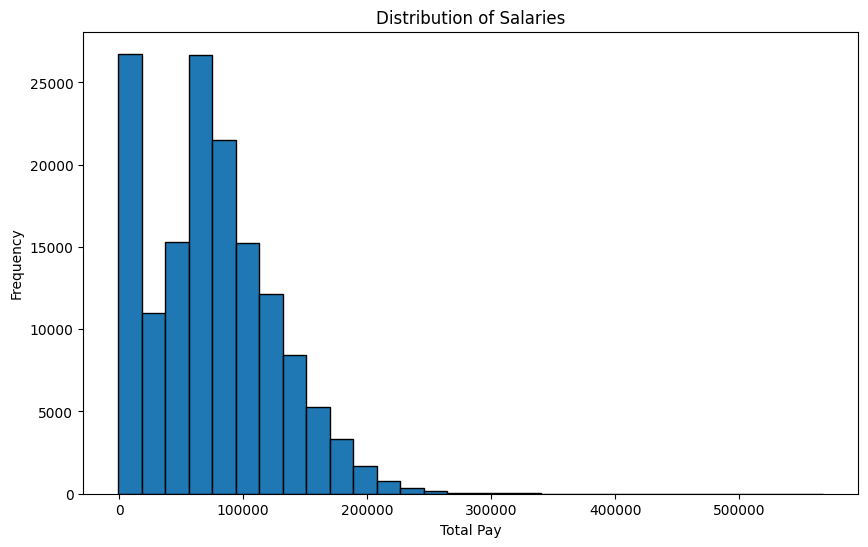

In [ ]:
# histogram distribution of salaries
plt.figure(figsize=(10, 6))
plt.hist(df['TotalPay'], bins=30, edgecolor='black')
plt.title('Distribution of Salaries')
plt.xlabel('Total Pay')
plt.ylabel('Frequency')
plt.show()

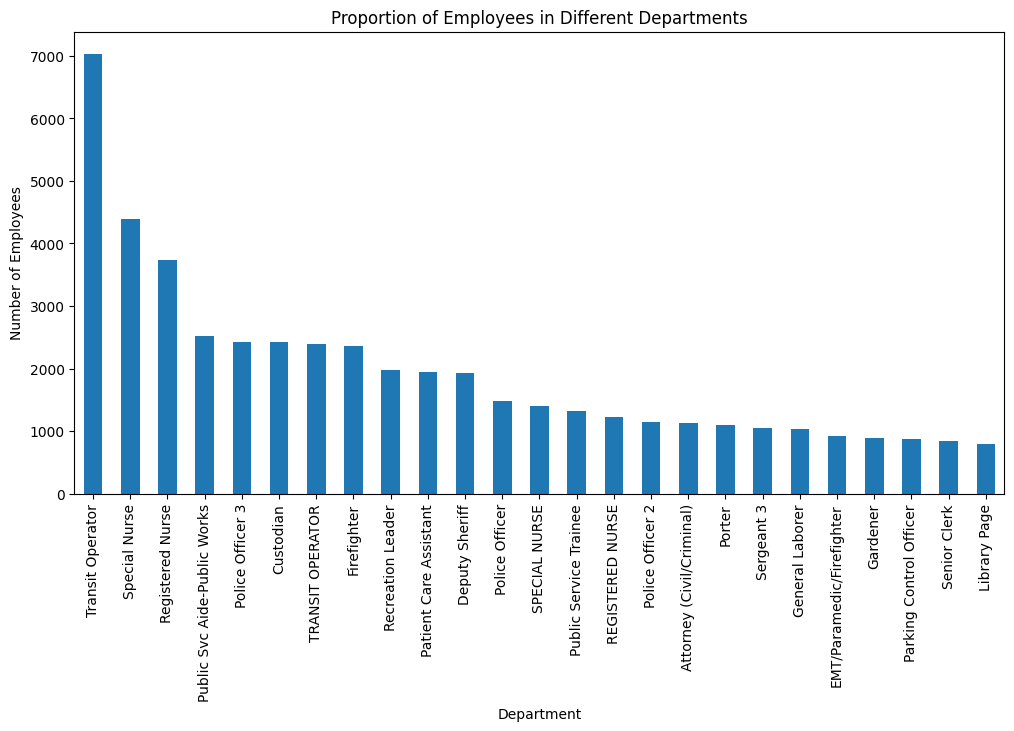

In [ ]:
# Bar chart proportion of employees in different departments
department_counts = df['JobTitle'].value_counts().head(25)  # Top 25 departments
plt.figure(figsize=(12, 6))
department_counts.plot(kind='bar')
plt.title('Proportion of Employees in Different Departments')
plt.xlabel('Department')
plt.ylabel('Number of Employees')
plt.show()

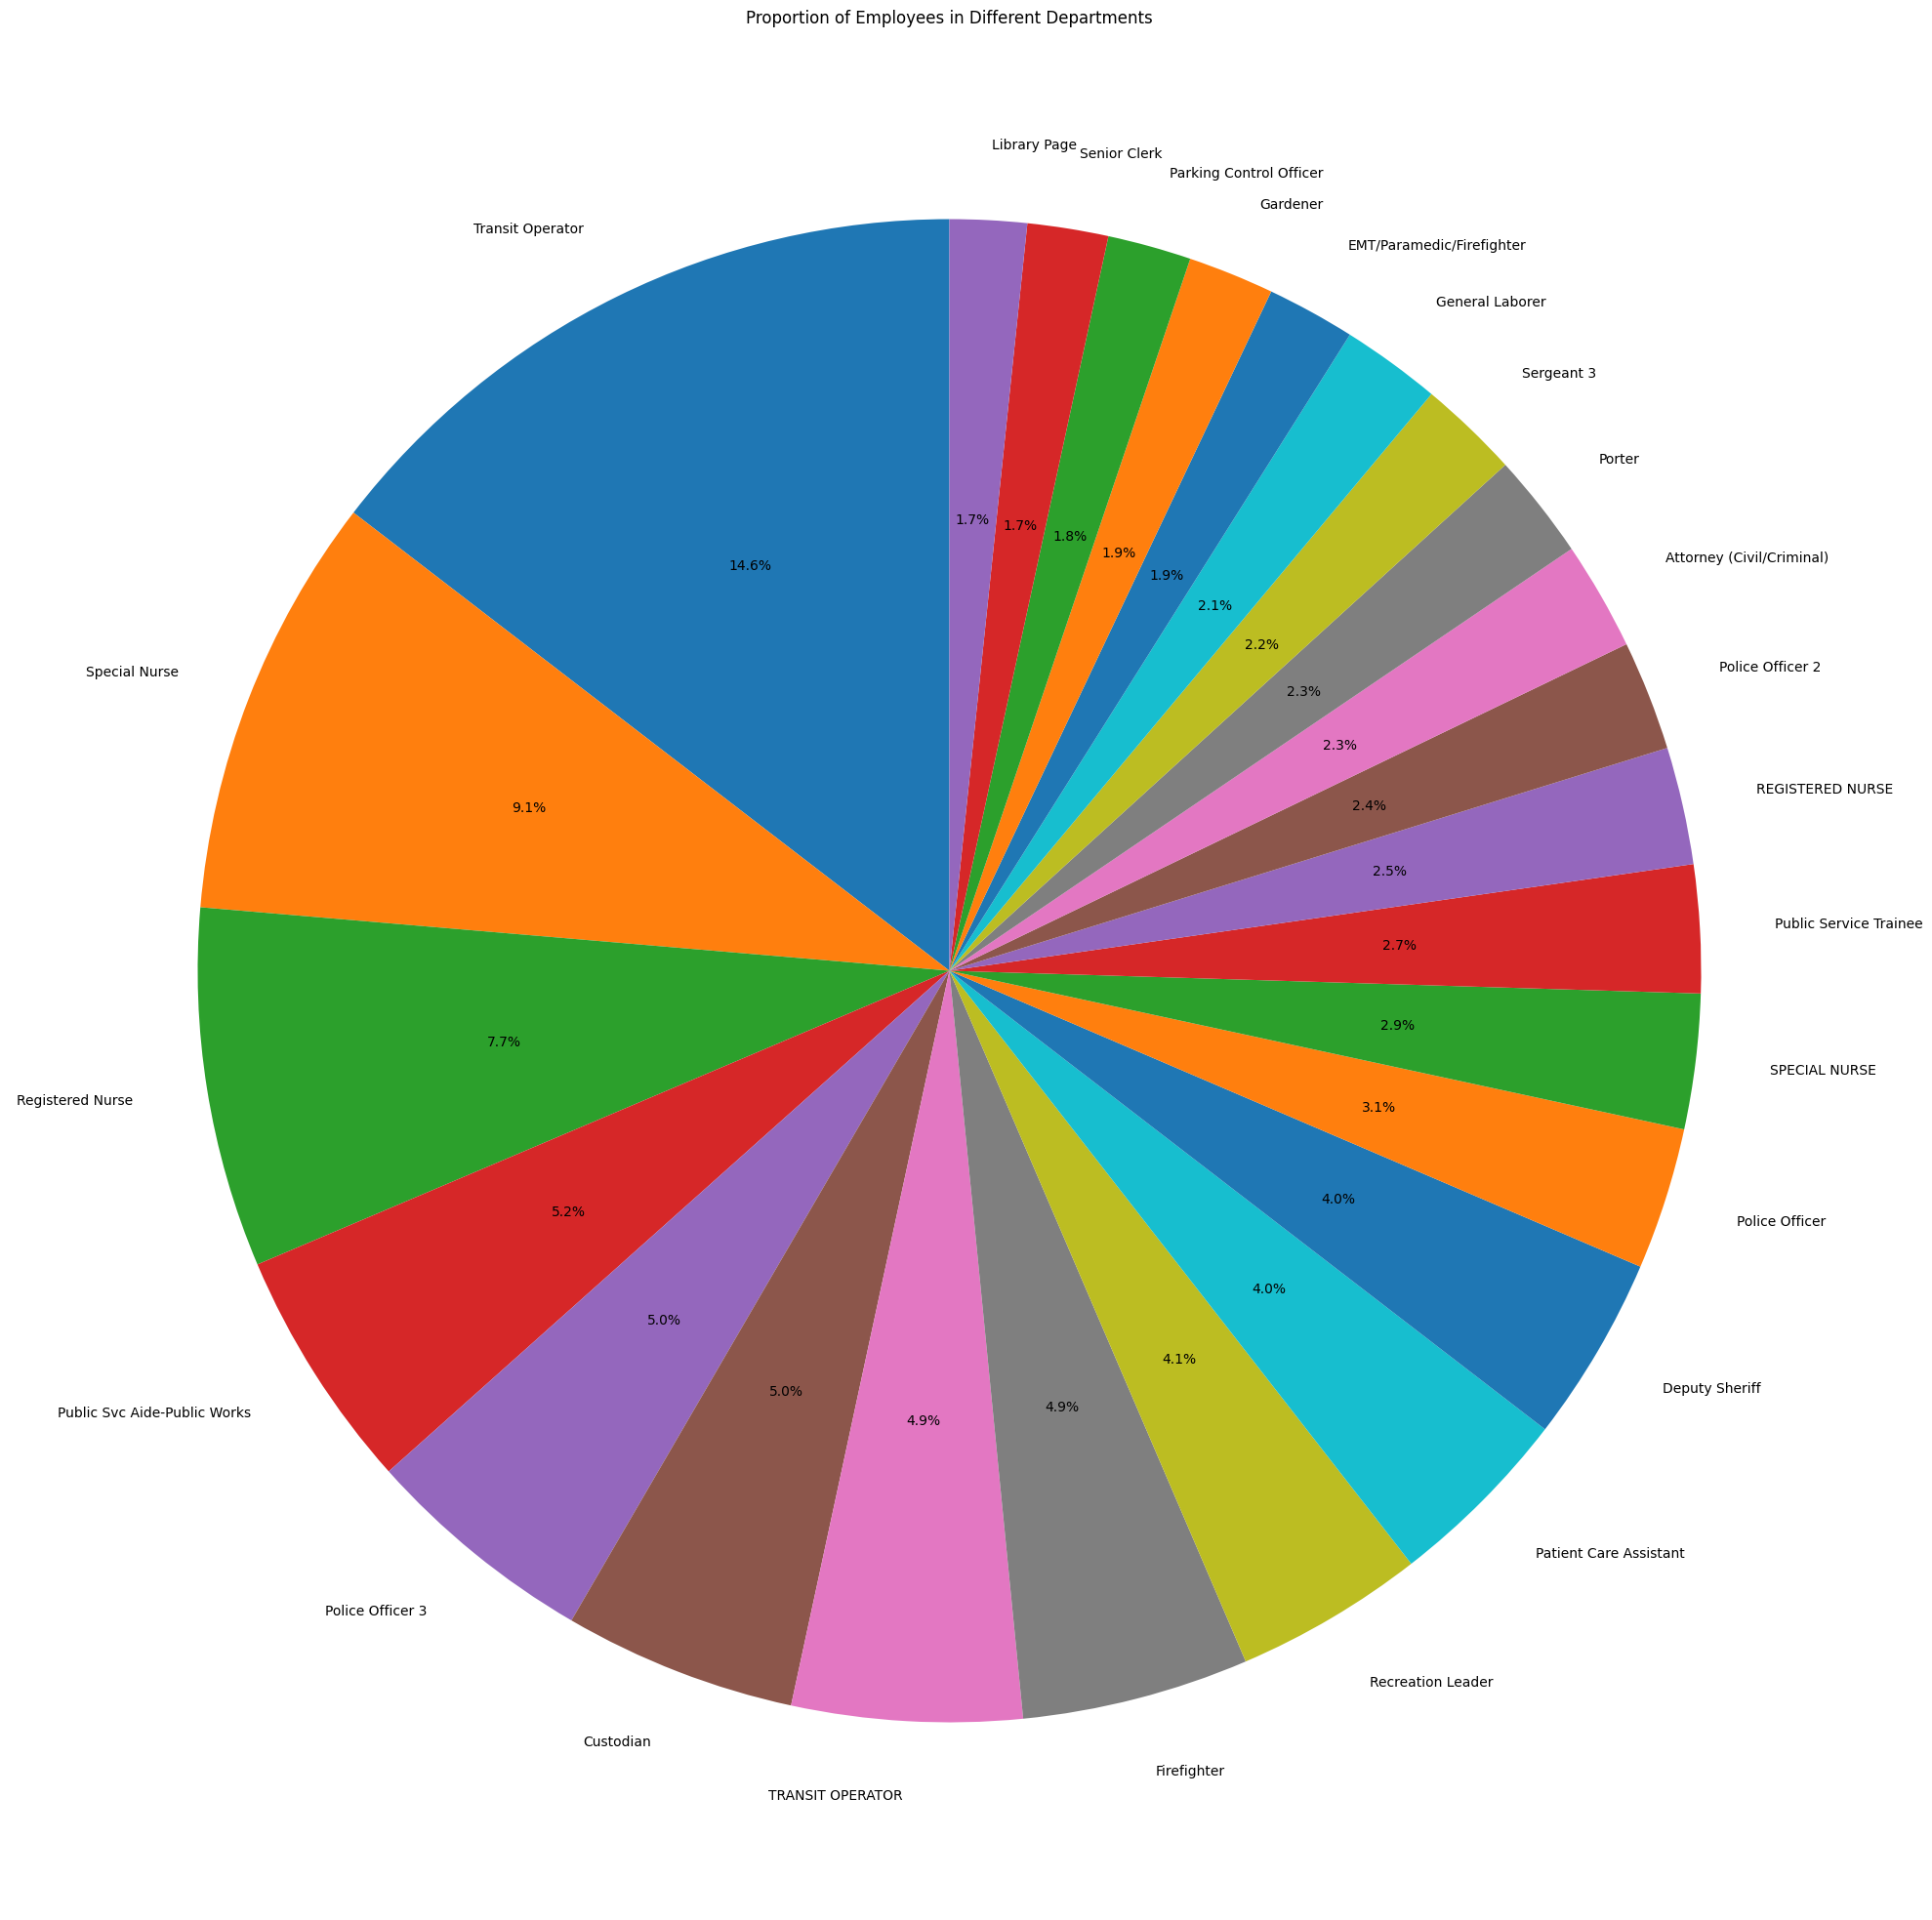

In [ ]:
# Pie chart
plt.figure(figsize=(25, 25))
plt.pie(department_counts, labels=department_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Proportion of Employees in Different Departments')
plt.show()



# 5th Task

In [52]:
# Comparing average salaries across different jobs
# Group the data by 'JobTitle' & calculate summary statistics
group_by_Job = df.groupby('JobTitle')['TotalPay'].agg(['count', 'mean', 'median', 'min', 'max'])
group_by_Job_filtered = group_by_Job[group_by_Job['count'] > 1000]
group_by_Job_sorted = group_by_Job_filtered.sort_values(by='mean', ascending=False)

print(group_by_Job_sorted)


                              count           mean      median     min  \
JobTitle                                                                 
Sergeant 3                     1047  164651.755349  163957.310   67.42   
Firefighter                    2359  145881.787516  150446.310    0.00   
Attorney (Civil/Criminal)      1126  137961.430036  153197.195    0.00   
Police Officer 2               1141  136563.471507  136344.890  115.78   
Police Officer 3               2421  134906.890909  137768.890    0.00   
Registered Nurse               3736  115700.594866  124361.240    0.00   
Deputy Sheriff                 1933  109713.568050  109050.350    0.00   
REGISTERED NURSE               1219  106621.140689  114009.050  191.34   
Police Officer                 1476   96281.656843  108335.565    0.00   
Transit Operator               7036   64711.146917   72654.545    0.00   
TRANSIT OPERATOR               2388   61742.636353   70132.270    0.00   
General Laborer                1033   

In [ ]:
# Comparing average salaries across different years
# Grouping the data by 'Year' and calculating summary statistics
group_by_Y = df.groupby('Year')['TotalPay'].agg(['count', 'mean', 'median', 'min', 'max'])
print(group_by_Y)

      count          mean     median     min        max
Year                                                   
2011  36159  71744.103871  68213.240    0.00  567595.43
2012  36766  74113.262265  70714.680    0.00  362844.66
2013  37606  77611.443142  74500.015    0.00  347102.32
2014  38119  75471.836912  72366.280 -618.13  471952.64



# 6th Task

Correlation Coefficient: 0.9505423082497902


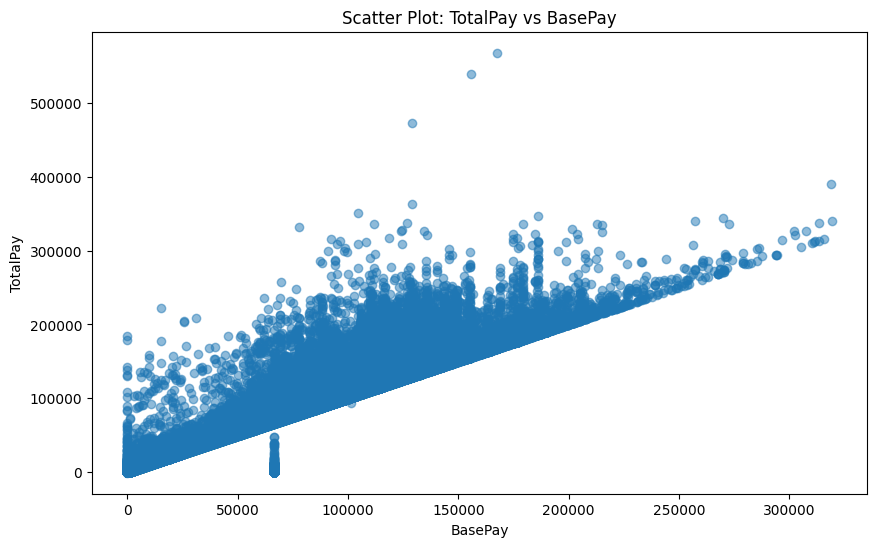

In [ ]:
correlation_coefficient = df['TotalPay'].corr(df['BasePay'])
print(f"Correlation Coefficient: {correlation_coefficient}")

plt.figure(figsize=(10, 6))
plt.scatter(df['BasePay'], df['TotalPay'], alpha=0.5)
plt.title('Scatter Plot: TotalPay vs BasePay')
plt.xlabel('BasePay')
plt.ylabel('TotalPay')
plt.show()

Correlation Coefficient: 0.9773115058435702


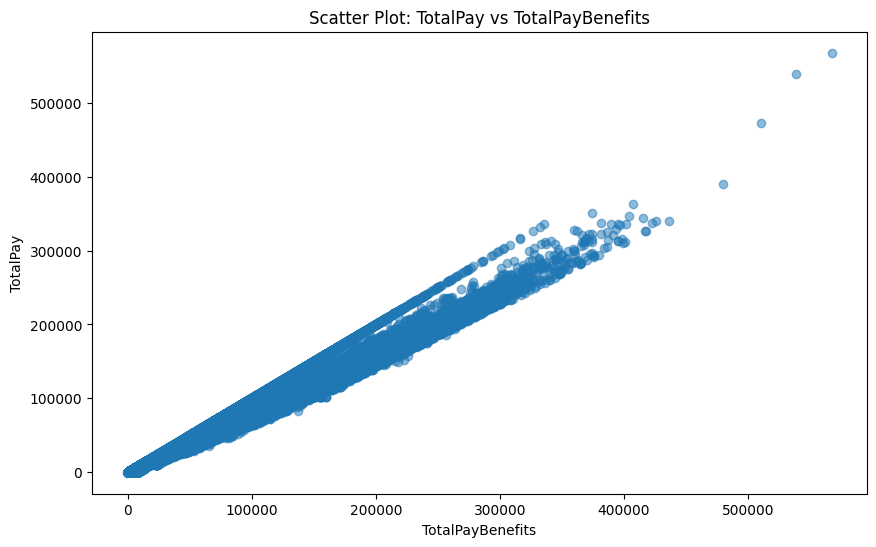

In [ ]:
correlation_coefficient = df['TotalPay'].corr(df['TotalPayBenefits'])
print(f"Correlation Coefficient: {correlation_coefficient}")

plt.figure(figsize=(10, 6))
plt.scatter(df['TotalPayBenefits'], df['TotalPay'], alpha=0.5)
plt.title('Scatter Plot: TotalPay vs TotalPayBenefits')
plt.xlabel('TotalPayBenefits')
plt.ylabel('TotalPay')
plt.show()

Correlation Coefficient: 0.5048588704522461


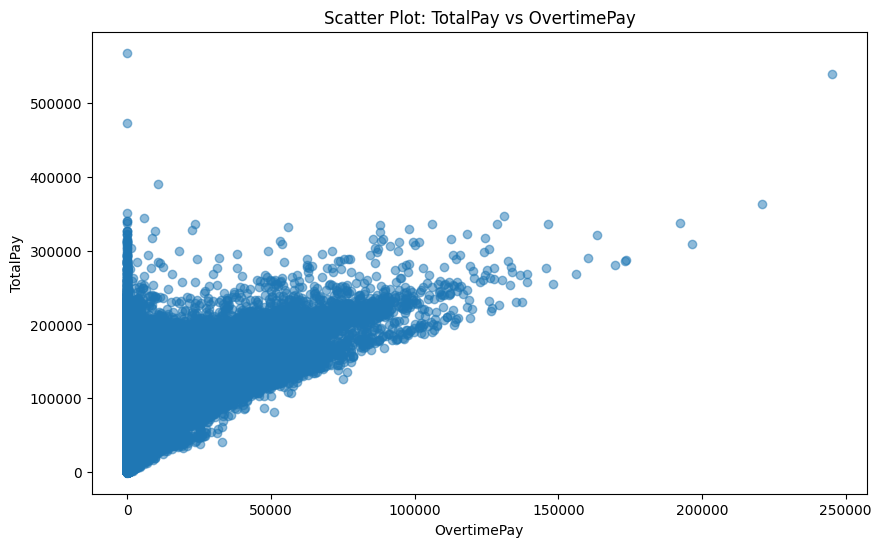

In [ ]:
correlation_coefficient = df['TotalPay'].corr(df['OvertimePay'])
print(f"Correlation Coefficient: {correlation_coefficient}")

plt.figure(figsize=(10, 6))
plt.scatter(df['OvertimePay'], df['TotalPay'], alpha=0.5)
plt.title('Scatter Plot: TotalPay vs OvertimePay')
plt.xlabel('OvertimePay')
plt.ylabel('TotalPay')
plt.show()



# 7th Task

After reviewing the analysis, I concluded that:

San Francisco have wide salary range depending on the job

by looking at the histogram (distribution of salaries) we can see that the majority of the salaries are between 0 and 100000 (mostly about 75000) and a very few get paid more than 200000.

by looking at the bar (or pie) chart (employees in different departments) we can see that the highest number of employees are working in transit operating, nursing or as first responders(officers, firefighters and paramedics)

the highest paid jobs (mean) (more than 1000 employee) is surgeant 3 than Firefighter
the lowest paid jobs (mean) (more than 1000 employee) is Recreation Leader

the highest earner in SF is GENERAL MANAGER-METROPOLITAN TRANSIT AUTHORITY  with 567595.43  
the lowest earners in SF are Drug Court Coordinator ,IS Technician Assistant, Public Safety Comm Tech

the mean salary in general is getting higher by the year

Correlation Coefficient between  salary & BasePay: 0.9505423082497902
the higher the base pay the higher the salary 95% of the times

Correlation Coefficient between  salary & TotalPayBenifets: 0.9773115058435702
the higher the salary the higher the total pay benifets 97% of the times

Correlation Coefficient between  salary & overtimepay: 0.5048588704522461
the higher the salary the higher the overtime pay 50% of the times (not that related)
